In [3]:
import pandas as pd
import numpy as np
#import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings

%matplotlib inline 
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv("input/train.txt", sep="\s+")
test = pd.read_csv("input/test.txt", sep="\s+")

In [14]:
train.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


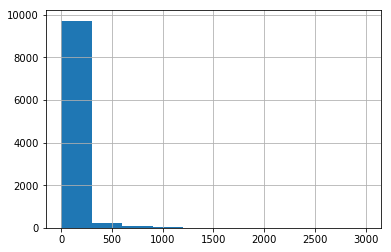

In [13]:
train.item_id.value_counts().hist()

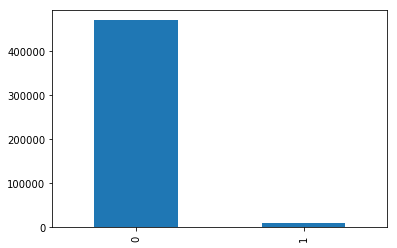

In [18]:
train.is_trade.value_counts().plot.bar()  

In [20]:
train_istrade = train[train.is_trade == 1]
train_istrade.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
14,7972325483281584825,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4001,"4879721024980945592:2636395404473730413,719936...",4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,1
52,5698113918818659664,919980016657888153,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;124376...,7066302540842412840,3948283326616421003,7,11,12,19,...,4001,"5755694407684602296:9142827274221572643,914848...",6597981382309269962,21,0.997040,5018,0.979661,0.979589,0.975442,1
55,3398773118902833938,557883074900282934,7908382889764677758;8277336076276184272,2636395404473730413;6434796455031995313;643479...,7066302540842412840,3948283326616421003,7,12,14,19,...,4001,8277336076276184272:2636395404473730413;176016...,6597981382309269962,21,0.997040,5018,0.979661,0.979589,0.975442,1
83,8127284011992533394,1093710751022752245,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;101341...,7066302540842412840,3948283326616421003,7,11,12,19,...,4012,509660095530134768:2636395404473730413;8277336...,6597981382309269962,21,0.997040,5018,0.979661,0.979589,0.975442,1
129,7059890618965359082,2540781378235236842,7908382889764677758;8277336076276184272,2072967855524022579;2636395404473730413;124376...,7066302540842412840,3948283326616421003,7,14,15,20,...,4001,8277336076276184272:2636395404473730413;176016...,6597981382309269962,21,0.997040,5018,0.979661,0.979589,0.975442,1


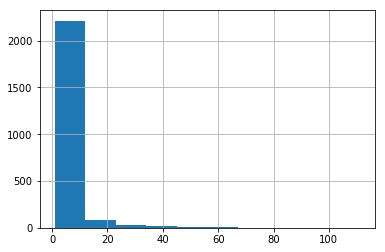

In [21]:
train_istrade.item_id.value_counts().hist()

In [6]:
test.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_timestamp,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description
0,2475218615076601065,2275895163219263378,7908382889764677758;8277336076276184272,2636395404473730413;7515802706813700848;302719...,7838285046767229711,7534238860363577544,7,6,8,14,...,1537885700,4005,8277336076276184272:-1;5799347067982556520:-1;...,5275548996133547595,13,0.985244,5011,0.964023,0.966550,0.955378
1,398316874173557226,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537862843,4001,"5755694407684602296:216555019471416386,2636395...",329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134
2,6586402638209028583,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537858222,4011,5755694407684602296:2636395404473730413;871073...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134
3,1040996105851528465,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537860915,4001,8710739180200009128:-1;5755694407684602296:263...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134
4,6316278569655873454,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537859074,4001,5755694407684602296:5131280576272319091;871073...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134


In [22]:
select_cols = ['item_price_level','item_sales_level','item_collected_level','item_pv_level','user_gender_id','user_age_level','user_star_level','context_page_id',
              'shop_review_num_level','shop_review_positive_rate','shop_star_level','shop_score_service','shop_score_delivery','shop_score_description']

select_train = train[select_cols]

In [23]:
select_train.head()

,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_gender_id,user_age_level,user_star_level,context_page_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description
0,3,3,4,14,1,1003,3003,4006,4,1.0,5002,1.0,1.0,1.0
1,3,3,4,14,0,1002,3006,4001,4,1.0,5002,1.0,1.0,1.0
2,3,3,4,14,0,1003,3004,4001,4,1.0,5002,1.0,1.0,1.0
3,3,3,4,14,1,1004,3006,4016,4,1.0,5002,1.0,1.0,1.0
4,3,3,4,14,0,1002,3001,4001,4,1.0,5002,1.0,1.0,1.0


In [ ]:
#from sklearn import linear_model
#from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
X = train[select_cols]
Y = train['is_trade']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4, random_state=0)
# This is your model that will learn to predict
#model = RandomForestRegressor()
model = SVC()
print("Training...")
# Your model is trained on the training_data
model.fit(X_train, y_train)

print("Predicting...")
# Your trained model is now used to make predictions on the numerai_tournament_data
# The model returns two columns: [probability of 0, probability of 1]
# We are just interested in the probability that the target is 1.
y_prediction = model.predict_proba(X_test)
test_pred = y_prediction[:, 1]
print('误差 ', log_loss(y_test, test_pred))


Training...
